In [896]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout, LSTM,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras import optimizers
import time


In [897]:
def creat_dataset(dataset, look_back=1):  # look_back表示用当前项的前look_back项预测当前1项
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i: (i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)


In [898]:
dataframe = pd.read_csv('btc_all_feature.csv')
dataframe

,Date,High,Low,Close,Log return,Price change,Price volatility,Volume,ETH close,ETH log return,gold_high,gold_low,gold_close,gold_log_return,gold_price_change,gold_price_volatility
0,2018/1/1,14112.20020,13154.70020,13657.20020,0.080000,0.070232,0.042196,1.029120e+10,772.640991,0.100000,"1,317.60","1,302.30","1,313.70",0,0.011679835,0.007014536
1,2018/1/2,15444.59961,13163.59961,14982.09961,0.092589,0.159465,0.095972,1.684660e+10,884.443970,0.135145,"1,317.60","1,302.30","1,313.70",0,0.011679835,0.007014536
2,2018/1/3,15572.79981,14844.50000,15201.00000,0.014505,0.047887,0.028765,1.687190e+10,962.719971,0.084803,"1,320.10","1,312.10","1,316.20",0.001901214,0.006078565,0.003650562
3,2018/1/4,15739.70020,14522.20020,15599.20020,0.025858,0.080464,0.048350,2.178320e+10,980.921997,0.018730,"1,322.00","1,319.40","1,319.40",0.002428291,0.001968653,0.001182297
4,2018/1/5,17705.19922,15202.79981,17429.50000,0.110945,0.152085,0.091513,2.384090e+10,997.719971,0.016980,"1,320.30","1,320.30","1,320.30",0.000681896,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2021/12/28,50679.85938,47414.21094,47588.85547,-0.062151,0.066582,0.040001,3.343038e+10,3800.893066,-0.060401,"1,818.00","1,805.50","1,810.20",0.001160766,0.006899407,0.004143532
1458,2021/12/29,48119.74219,46201.49609,46444.71094,-0.024336,0.040675,0.024431,3.004923e+10,3628.531738,-0.046408,"1,805.10","1,791.40","1,805.10",-0.002821344,0.007618518,0.004575408
1459,2021/12/30,47879.96484,46060.31250,47178.12500,0.015668,0.038741,0.023269,2.668649e+10,3713.852051,0.023242,"1,816.00","1,796.00","1,812.70",0.004201455,0.011074197,0.006650801
1460,2021/12/31,48472.52734,45819.95313,46306.44531,-0.018649,0.056263,0.033798,3.697417e+10,3682.632813,-0.008442,"1,827.80","1,821.40","1,827.50",0.008131466,0.003507618,0.002106542


In [899]:
# dataframe1 = dataframe.iloc[:,[0,4]]

In [900]:
# dataframe1

In [901]:
# dataset1 = dataframe1.values
# dataset1

In [902]:
# dataframe2= dataframe.iloc[:,[0,6]]
# dataframe2

In [903]:
# dataframe2 = dataframe.iloc[:,[0,4]]
# dataframe2

In [904]:
# date1 = dataframe1.iloc[:,0].values
# date2 = dataframe2.iloc[:,0].values

In [905]:
# date1,date2

In [906]:
# dataset2 = dataframe2.values
# dataset2

In [907]:
# dataframe3= dataframe.iloc[:,[0,1]]
# dataset3 = dataframe3.values
# dataset3

In [908]:
# dataframe4= dataframe.iloc[:,[0,2]]
# dataset4 = dataframe4.values
# dataset4

In [909]:
# dataframe5= dataframe.iloc[:,[0,3]]
# dataset5 = dataframe5.values
# dataset5

In [910]:
# for j in range(len(dataset1)):
#     for i in range(len(dataset2_temp)):
#         flag = 0
#         if str(dataset2_temp[i][0]) == str(dataset1[j][0]):
#             flag = 1
#             dataset2[j] = dataset2_temp[i]
#             break
#     if flag == 0:
#         dataset2[j] = [dataset1[j][0],mean]
                
            

In [911]:
# dataset2[0:100]

In [912]:
# for i in range(len(dataset2)):
#     if dataset2[i][1] == "-":
#         dataset2[i][1] = mean

In [913]:
# dataset2[0:100]

In [914]:
dataset = dataframe.iloc[:,4:7].values
dataset

array([[ 0.08      ,  0.07023167,  0.04219577],
       [ 0.09258926,  0.15946477,  0.09597208],
       [ 0.01450509,  0.04788721,  0.0287647 ],
       ...,
       [ 0.01566774,  0.03874062,  0.02326902],
       [-0.01864917,  0.05626269,  0.03379811],
       [ 0.02937373,  0.03270074,  0.01964055]])

In [915]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 时间序列不需要显式的时间标签，只需要一个数值组成的序列即可

In [916]:
# dataset2 = scaler.fit_transform(dataset2[:,1].reshape(-1, 1))

In [917]:
# dataset2

In [918]:
dataset

array([[0.85575296, 0.13806754, 0.13540988],
       [0.87553026, 0.32581697, 0.32010442],
       [0.75286263, 0.09105404, 0.08928093],
       ...,
       [0.75468912, 0.07180931, 0.07040606],
       [0.70077839, 0.10867633, 0.10656814],
       [0.77622078, 0.0591012 , 0.05794406]])

In [919]:
train_size = int(len(dataset)*0.85)
test_size = len(dataset)-train_size
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]
train_size,test_size

(1242, 220)

In [920]:
look_back = 5
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)

In [921]:
trainX.shape  # 第一个是样本总数，第二个是每一个样本中的时间序列的长度，第三个是每一个时间序列中的每一个元素的编码长度

(1237, 5, 3)

In [922]:
trainY

array([[0.73883906, 0.10598093, 0.10392375],
       [0.63308305, 0.17676986, 0.17341074],
       [0.60019517, 0.30915231, 0.30366834],
       ...,
       [0.8985185 , 0.28921967, 0.28402209],
       [0.71769832, 0.16636946, 0.16319606],
       [0.76614748, 0.14411323, 0.14134422]])

In [923]:
testY

array([[0.70257137, 0.11077931, 0.1086314 ],
       [0.76774393, 0.11875739, 0.11645932],
       [0.79693065, 0.11288102, 0.11069347],
       [0.6344974 , 0.18816851, 0.18460842],
       [0.67184815, 0.16466372, 0.16152099],
       [0.74373298, 0.0566876 , 0.05557735],
       [0.62586891, 0.18850702, 0.184941  ],
       [0.72594747, 0.17785243, 0.17447411],
       [0.90205579, 0.29451387, 0.2892389 ],
       [0.7028119 , 0.13136081, 0.12882739],
       [0.75688822, 0.07966871, 0.07811396],
       [0.65324876, 0.14667646, 0.14386042],
       [0.87940669, 0.24320483, 0.23871761],
       [0.77446924, 0.10751565, 0.10542942],
       [0.7373939 , 0.07798065, 0.07645839],
       [0.64790302, 0.11546801, 0.11323174],
       [0.71800312, 0.1037108 , 0.10169665],
       [0.63361577, 0.1582584 , 0.15523132],
       [0.72253464, 0.08017178, 0.07860735],
       [0.73370711, 0.14940078, 0.14653489],
       [0.54231086, 0.26818997, 0.26330893],
       [0.77065848, 0.28796214, 0.28278308],
       [0.

In [924]:
testY.shape

(215, 3)

In [925]:
model = Sequential()

model.add(LSTM(100, input_shape=(trainX.shape[1],trainX.shape[2])))
#model.add(Dropout(0.2))

# model.add(LSTM(100, return_sequences=False))
# #model.add(Dropout(0.2))

# model.add(LSTM(200, return_sequences=True))
# #model.add(Dropout(0.2))

# model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Dense(3))

model.add(Activation('relu'))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 100)               41600     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 303       
_________________________________________________________________
activation_14 (Activation)   (None, 3)                 0         
Total params: 52,003
Trainable params: 52,003
Non-trainable params: 0
_________________________________________________________________


In [926]:
history = model.fit(trainX, trainY, batch_size=64, nb_epoch=50, 
                    validation_split=0.1, verbose=2)
print('compilatiom time:', time.time()-start)

Train on 1113 samples, validate on 124 samples
Epoch 1/50
 - 2s - loss: 0.0578 - val_loss: 0.0175
Epoch 2/50
 - 0s - loss: 0.0109 - val_loss: 0.0084
Epoch 3/50
 - 0s - loss: 0.0071 - val_loss: 0.0081
Epoch 4/50
 - 0s - loss: 0.0061 - val_loss: 0.0076
Epoch 5/50
 - 0s - loss: 0.0055 - val_loss: 0.0080
Epoch 6/50
 - 0s - loss: 0.0055 - val_loss: 0.0072
Epoch 7/50
 - 0s - loss: 0.0054 - val_loss: 0.0071
Epoch 8/50
 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 9/50
 - 0s - loss: 0.0051 - val_loss: 0.0070
Epoch 10/50
 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 11/50
 - 0s - loss: 0.0053 - val_loss: 0.0070
Epoch 12/50
 - 0s - loss: 0.0050 - val_loss: 0.0074
Epoch 13/50
 - 0s - loss: 0.0050 - val_loss: 0.0070
Epoch 14/50
 - 0s - loss: 0.0050 - val_loss: 0.0073
Epoch 15/50
 - 0s - loss: 0.0050 - val_loss: 0.0074
Epoch 16/50
 - 0s - loss: 0.0048 - val_loss: 0.0072
Epoch 17/50
 - 0s - loss: 0.0049 - val_loss: 0.0069
Epoch 18/50
 - 0s - loss: 0.0049 - val_loss: 0.0074
Epoch 19/50
 - 0s - loss: 

In [927]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [928]:
trainPredict

array([[0.76448995, 0.17724212, 0.17639874],
       [0.74710757, 0.1504888 , 0.14989716],
       [0.73507994, 0.15521935, 0.15289946],
       ...,
       [0.7205033 , 0.3081319 , 0.30535167],
       [0.7387956 , 0.25091437, 0.24998547],
       [0.72735137, 0.20994425, 0.20899509]], dtype=float32)

In [929]:
trainY

array([[0.73883906, 0.10598093, 0.10392375],
       [0.63308305, 0.17676986, 0.17341074],
       [0.60019517, 0.30915231, 0.30366834],
       ...,
       [0.8985185 , 0.28921967, 0.28402209],
       [0.71769832, 0.16636946, 0.16319606],
       [0.76614748, 0.14411323, 0.14134422]])

In [930]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [931]:
trainPredict = trainPredict[:,0].reshape(-1,1)
trainY = trainY[:,0].reshape(-1,1)
testPredict = testPredict[:,0].reshape(-1,1)
testY = testY[:,0].reshape(-1,1)

In [932]:
trainPredict.shape

(1237, 1)

In [933]:
trainY.shape

(1237, 1)

In [934]:
testPredict.shape

(215, 1)

In [935]:
testY.shape

(215, 1)

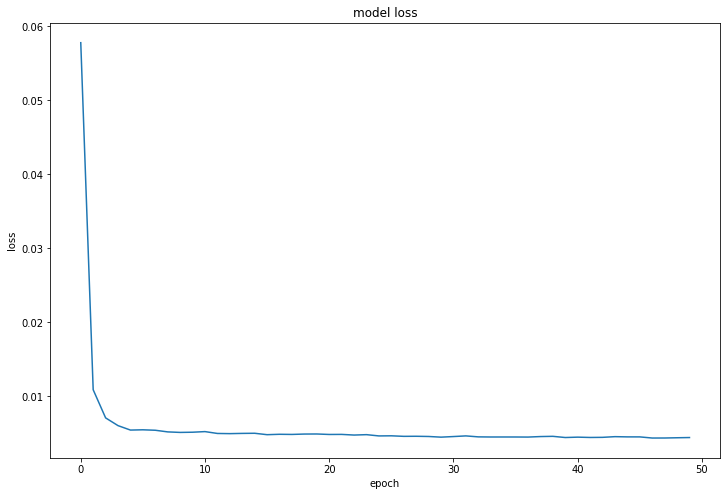

In [936]:
fig1 = plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [937]:
dataset1 = dataset[:,0].reshape(-1,1)
trainPredictPlot = np.zeros(shape=dataset1.shape)
trainPredictPlot[:,:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (dataset1.shape[0], 1))
# 使用之前的look_back+1个的数据预测当前的1个数据，所以从第look_back+1个才开始预测
trainPredictPlot[look_back: len(trainPredict)+look_back, :] = trainPredict

In [938]:
testPredictPlot = np.zeros(shape=dataset1.shape)
testPredictPlot[:,:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (dataset1.shape[0], 1))
testPredictPlot[(len(trainPredict)+look_back)+look_back: len(dataset1), :] = testPredict

In [939]:
dataset

array([[0.85575296, 0.13806754, 0.13540988],
       [0.87553026, 0.32581697, 0.32010442],
       [0.75286263, 0.09105404, 0.08928093],
       ...,
       [0.75468912, 0.07180931, 0.07040606],
       [0.70077839, 0.10867633, 0.10656814],
       [0.77622078, 0.0591012 , 0.05794406]])

In [940]:
dataset1 = scaler.inverse_transform(dataset)[:,0].reshape(-1,1)
print(dataset1)

[[ 0.08      ]
 [ 0.09258926]
 [ 0.01450509]
 ...
 [ 0.01566774]
 [-0.01864917]
 [ 0.02937373]]


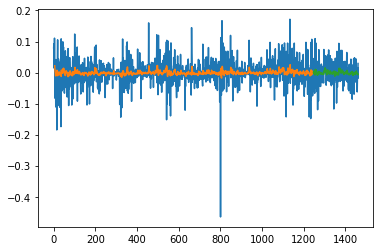

In [941]:
plt.plot(dataset1)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [942]:
len(dataset)

1462

In [943]:
# sum_t = 0
# testY = testY.reshape(-1,)
# testPredict = testPredict.reshape(-1,)
# print(testY.shape)
# print(testPredict.shape)
# for i in range(len(testY)):
#     testY[i] = testY[i] / (max(testY) - min(testY))
#     testPredict[i] = testPredict[i] / (max(testPredict) - min(testPredict))
# for i in range(len(testY)):
#     sum_t += (testPredict[i] - testY[i])**2
# rmse = (sum_t / len(testPredict))**0.5
# rmse

In [944]:
import numpy as np
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
#调用

# mean_absolute_error(testY,testPredict)
np.sqrt(mean_squared_error(testY,testPredict))  # RMSE就是对MSE开方即可



0.03696514930932408

In [945]:
#  MAPE和SMAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

#  调用
mape(testY, testPredict)


134.11408192570178

In [946]:
r2_score(testY,testPredict)

-0.019579605654846288

In [947]:
dataset1

array([[ 0.08      ],
       [ 0.09258926],
       [ 0.01450509],
       ...,
       [ 0.01566774],
       [-0.01864917],
       [ 0.02937373]])

In [948]:
dataset

array([[0.85575296, 0.13806754, 0.13540988],
       [0.87553026, 0.32581697, 0.32010442],
       [0.75286263, 0.09105404, 0.08928093],
       ...,
       [0.75468912, 0.07180931, 0.07040606],
       [0.70077839, 0.10867633, 0.10656814],
       [0.77622078, 0.0591012 , 0.05794406]])

In [949]:
# 

In [950]:
prices = dataframe.iloc[:,3].values
testPrice = prices[train_size+look_back: len(dataset)]
# testPredict_price = np.ndarray(testPredict.shape)

In [951]:
# testPredict,testPredict.shape

In [952]:
# trainPredict,trainPredict.shape

In [953]:
# trainPrice.shape

In [954]:
testPrice = testPrice.reshape(-1,1)

In [955]:
testPredict.shape

(215, 1)

In [956]:
import math
testPredict_price[0] = prices[train_size+look_back-1]*math.exp(testPredict[0])
for i in range(1,len(testPrice)):
    testPredict_price[i] = testPrice[i-1]*math.exp(testPredict[i])

In [957]:
testPredict_price

array([[37365.36831307],
       [36597.41253   ],
       [37613.03218485],
       [39391.23911894],
       [36927.14671039],
       [35442.07204516],
       [35656.31032093],
       [33306.9101584 ],
       [33252.80441148],
       [37739.60554828],
       [36883.21480084],
       [37339.53027259],
       [35478.82095185],
       [39465.50380528],
       [40482.44483713],
       [40544.58101742],
       [38237.28550306],
       [37934.53844261],
       [35552.7009299 ],
       [35316.75251758],
       [35511.01076437],
       [31448.16950353],
       [32465.57840318],
       [33754.38910802],
       [34697.38866405],
       [31508.46150803],
       [32107.75612472],
       [34770.35113498],
       [34390.95085073],
       [35943.94396115],
       [35118.97588639],
       [33503.33474211],
       [33750.35310222],
       [34592.11944946],
       [35256.46111304],
       [33656.30869998],
       [34196.79787011],
       [33737.36566821],
       [32711.06839351],
       [33724.94672121],


In [958]:
testPredict_price.shape

(215, 1)

In [959]:
np.sqrt(mean_squared_error(testPrice,testPredict_price))

1699.8216915538558

In [960]:
mape(testPrice,testPredict_price)

2.864266778212867

In [961]:
r2_score(testPrice,testPredict_price)

0.969822351089456

In [962]:
testPrice

array([[36684.92578],
       [37575.17969],
       [39208.76563],
       [36894.40625],
       [35551.95703],
       [35862.37891],
       [33560.70703],
       [33472.63281],
       [37345.12109],
       [36702.59766],
       [37334.39844],
       [35552.51563],
       [39097.85938],
       [40218.47656],
       [40406.26953],
       [38347.0625 ],
       [38053.50391],
       [35787.24609],
       [35615.87109],
       [35698.29688],
       [31676.69336],
       [32505.66016],
       [33723.02734],
       [34662.4375 ],
       [31637.7793 ],
       [32186.27734],
       [34649.64453],
       [34434.33594],
       [35867.77734],
       [35040.83594],
       [33572.11719],
       [33897.04688],
       [34668.54688],
       [35287.78125],
       [33746.00391],
       [34235.19531],
       [33855.32813],
       [32877.37109],
       [33798.01172],
       [33520.51953],
       [34240.1875 ],
       [33155.84766],
       [32702.02539],
       [32822.34766],
       [31780.73047],
       [31

In [963]:
testPredict_price

array([[37365.36831307],
       [36597.41253   ],
       [37613.03218485],
       [39391.23911894],
       [36927.14671039],
       [35442.07204516],
       [35656.31032093],
       [33306.9101584 ],
       [33252.80441148],
       [37739.60554828],
       [36883.21480084],
       [37339.53027259],
       [35478.82095185],
       [39465.50380528],
       [40482.44483713],
       [40544.58101742],
       [38237.28550306],
       [37934.53844261],
       [35552.7009299 ],
       [35316.75251758],
       [35511.01076437],
       [31448.16950353],
       [32465.57840318],
       [33754.38910802],
       [34697.38866405],
       [31508.46150803],
       [32107.75612472],
       [34770.35113498],
       [34390.95085073],
       [35943.94396115],
       [35118.97588639],
       [33503.33474211],
       [33750.35310222],
       [34592.11944946],
       [35256.46111304],
       [33656.30869998],
       [34196.79787011],
       [33737.36566821],
       [32711.06839351],
       [33724.94672121],


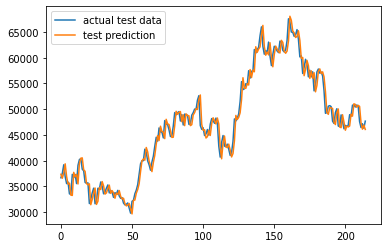

In [964]:
plt.plot(testPrice,label = 'actual test data')
plt.plot(testPredict_price,label = 'test prediction')
plt.legend()